In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style

np.random.seed(7) # seeding random number generator

In [ ]:
# Read file , gives first two rows
productcsv = "C:/Users/shydhevi/Documents/Textmining/Amazon_Product_Reviews_May19.csv"
productdf  = pd.read_csv(productcsv)
productdf.head(2)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
#Descriptive Statistics
productdata = productdf.copy()
productdata.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [ ]:
productdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [ ]:
productdata["categories"].unique()


array(['AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care',
       'Audio & Video Accessories,TV, Video & Home Audio,Home Audio & Video Accessories,DVD Cases,Electronics,Media Cases & Storage,TV, Video & Audio Accessories,Media Storage & Organization,Disc Storage Wallets,Consumer Electronics,CD, DVD & Blu-ray Discs,Blank Audio/Video Media,Accessories & Supplies,all electronics',
       'Stereos,Remote Controls,Audio Docks & Mini Speakers,Kitchen & Dining Features,Home & Tools,Electronics,New Networking,Wireless Speakers,Home, Garage & Office,Portable Speakers,iPod, Audio Player Accessories,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices,Alarms & Sensors,Amazon Devices,Amazon,Holiday Shop,Kitchen Dining Features,Amazon Echo,Amazon Echo Accessories,Net

In [ ]:
productdata["asins"].unique()

array(['B00QWO9P0O,B00LH3DMUO', 'B00DIHVMEA,B00EZ1ZTV0',
       'B01E6AO69U,B00L9EPT8O', 'B01J24C0TI', 'B073SQYXTW', 'B00ZV9RDKK',
       'B00QWO9P0O,B01IB83NZG,B00MNV8E0C', 'B00WRDS8H0',
       'B00EEBS9O0,B01CHQHIJK', 'B01B66989K,B00CD8ADKO,B00LA9H6UM',
       'B00DUGZFWY', 'B00F5CKWBA,B00KPQCWAU',
       'B0002LCUZK,B010CEC6MI,B01B25NN64', 'B074MCBG25,B075357QFB',
       'B00QFQRELG', 'B006GWO7UA', 'B01L7XWEQQ', 'B006BGZJJ4',
       'B00Y3QOH5G', 'B01BH83OOM', 'B00ZV9PXP2', 'B00NH144GK,B00LA9H1E8',
       'B00OP6SMCI', 'B00BGIQS1A', 'B006LW0W5Y', 'B0751RGYJV',
       'B00IOY8XWQ', 'B010RLCH2U', 'B01GAGYVU2', 'B0752151W6',
       'B018SZT3BK,B01AHB9CN2', 'B018Y226XO', 'B01AHB9CYG', 'B01ACEKAJY',
       'B00REQKWGA', 'B00IOYAM4I', 'B01IO618J8', 'B018Y22BI4',
       'B01AHBBG04', 'B01AHBDCKQ', 'B00VINDBJK',
       'B0189XZRTI,B0189XYY0Q,B0189XZ0KY', 'B01J94SWWU', 'B00QAVO43C',
       'B06VTJWRJW', 'B00QAVNWSK', 'B01J94SCAM', 'B01J94SBEY',
       'B01J94YIT6', 'B01J94T1Z2', 'B018Y224PY'

In [ ]:
asins_unique = len(productdata["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 65


In [ ]:
# Apply filter function to select certain categories
productfilterdata = productdata[productdata['categories'].str.contains('Electronics')]
productfilterdata

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review

In [ ]:
#Descriptive Statistics
productfilterdata.info()
productfilterdata.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23238 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   23238 non-null  object 
 1   dateAdded            23238 non-null  object 
 2   dateUpdated          23238 non-null  object 
 3   name                 23238 non-null  object 
 4   asins                23238 non-null  object 
 5   brand                23238 non-null  object 
 6   categories           23238 non-null  object 
 7   primaryCategories    23238 non-null  object 
 8   imageURLs            23238 non-null  object 
 9   keys                 23238 non-null  object 
 10  manufacturer         23238 non-null  object 
 11  manufacturerNumber   23238 non-null  object 
 12  reviews.date         23238 non-null  object 
 13  reviews.dateSeen     23238 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  11009 non-null 

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,11038.000000,23238.000000
mean,1.840066e+08,0.582714,4.506885
std,2.337036e+07,11.021185,0.967306
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [ ]:
# applying filter function for Product filter data
productfilter = productfilterdata.filter(["name", "asins", "reviews.text","categories","brand","reviews.rating","reviews.title","reviews.date","reviews.doRecommend","reviews.numHelpful"])

In [ ]:
productfilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23238 entries, 0 to 28331
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 23238 non-null  object 
 1   asins                23238 non-null  object 
 2   reviews.text         23238 non-null  object 
 3   categories           23238 non-null  object 
 4   brand                23238 non-null  object 
 5   reviews.rating       23238 non-null  int64  
 6   reviews.title        23238 non-null  object 
 7   reviews.date         23238 non-null  object 
 8   reviews.doRecommend  11009 non-null  object 
 9   reviews.numHelpful   11038 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.0+ MB


Visualizing the distributions of numerical variables:

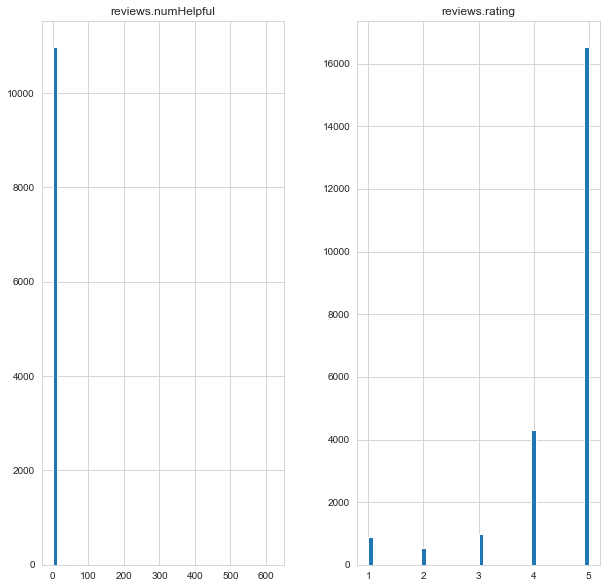

In [ ]:
productfilter.hist(bins=50, figsize=(10,10)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(productfilter)))
dataAfter = productfilter.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 23238
After 23238


In [ ]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    train = dataAfter.reindex(train_index)
    test = dataAfter.reindex(test_index)

In [ ]:
len(train)

18590

In [ ]:
train["reviews.rating"].value_counts()/len(train) # value_count() counts all the values based on column

5.0    0.601883
4.0    0.143787
3.0    0.037009
1.0    0.036256
2.0    0.021409
Name: reviews.rating, dtype: float64

In [ ]:
len(test)

4648

In [ ]:

train.head(2)

,name,asins,reviews.text,categories,brand,reviews.rating,reviews.title,reviews.date,reviews.doRecommend,reviews.numHelpful
15350,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Love the kindle will continue to buy them for ...,"Fire Tablets,Computers/Tablets & Networking,El...",Amazon,5.0,Great kindle,2017-03-03T00:00:00.000Z,True,0.0
16538,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Kindles are easy to carry when traveling on lo...,"Fire Tablets,Computers/Tablets & Networking,El...",Amazon,5.0,Kindles are great for traveling.,2017-05-13T00:00:00.000Z,True,0.0


In [ ]:
len(train["name"].unique()), len(train["asins"].unique())

(39, 39)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 15350 to 11922
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 15622 non-null  object 
 1   asins                15622 non-null  object 
 2   reviews.text         15622 non-null  object 
 3   categories           15622 non-null  object 
 4   brand                15622 non-null  object 
 5   reviews.rating       15622 non-null  float64
 6   reviews.title        15622 non-null  object 
 7   reviews.date         15622 non-null  object 
 8   reviews.doRecommend  5868 non-null   object 
 9   reviews.numHelpful   5882 non-null   float64
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [ ]:
train.groupby("asins")["name"].unique()

asins
B006BGZJJ4                          [Amazon Kindle Charger Power Adapter Wall Char...
B006GWO7UA                          [Kindle PowerFast International Charging Kit (...
B006LW0W5Y                            [AmazonBasics 16-Gauge Speaker Wire - 100 Feet]
B00BGIQS1A                          [Oem Amazon Kindle Power Usb Adapter Wall Trav...
B00DIHVMEA,B00EZ1ZTV0               [AmazonBasics Nylon CD/DVD Binder (400 Capacity)]
B00DUGZFWY                             [AmazonBasics 15.6-Inch Laptop and Tablet Bag]
B00EEBS9O0,B01CHQHIJK               [AmazonBasics Backpack for Laptops up to 17-in...
B00F5CKWBA,B00KPQCWAU                         [AmazonBasics External Hard Drive Case]
B00IOY8XWQ                          [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00NH144GK,B00LA9H1E8               [AmazonBasics USB 3.0 Cable - A-Male to B-Male...
B00QFQRELG                          [Amazon 9W PowerFast Official OEM USB Charger ...
B00QWO9P0O,B00LH3DMUO               [AmazonBasic

In [ ]:
# Lists all the different names for this product that have 2 ASINs
different_names = train[train["asins"] == "B018SZT3BK,B01AHB9CN2"]["name"].unique()
for name in different_names:
    print(name)

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black


In [ ]:
train[train["asins"] == "B018SZT3BK,B01AHB9CN2"]["name"].value_counts()

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    1935
Name: name, dtype: int64

In [ ]:
#fig = plt.figure(figsize=(16,10))
#ax1 = plt.subplot(211)
#ax2 = plt.subplot(212, sharex = ax1)
#train["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
#np.log10(train["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
#plt.show()

In [ ]:
# Entire training dataset average rating
train["reviews.rating"].mean()

4.491806426833952

In [ ]:
len(test)

4648

In [ ]:
counts = train["asins"].value_counts().to_frame()
counts.head()

,asins
"B00QWO9P0O,B00LH3DMUO",6639
"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",2999
"B018SZT3BK,B01AHB9CN2",1935
B018Y226XO,1357
B018Y224PY,563


In [ ]:
avg_rating = train.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B006BGZJJ4,4.625
B006GWO7UA,4.750
B006LW0W5Y,5.000
B00BGIQS1A,1.000
"B00DIHVMEA,B00EZ1ZTV0",5.000


In [ ]:
## Sentiment Analysis - Extracting Positive , Negative and Neutral

def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
train["Sentiment"] = train["reviews.rating"].apply(sentiments)
test["Sentiment"] = test["reviews.rating"].apply(sentiments)
train["Sentiment"][:10]

15350    Positive
16538    Positive
1547     Positive
626      Positive
6960     Positive
4080     Positive
2463     Positive
401      Positive
16647    Positive
12480    Positive
Name: Sentiment, dtype: object

In [ ]:
# Prepare data
Senti_train = train["reviews.text"]
Senti_train_targetSentiment = train["Sentiment"]
Senti_test = test["reviews.text"]
Senti_test_targetSentiment =test["Sentiment"]
print(len(Senti_train), len(Senti_test))

18590 4648


In [ ]:
# Replace "nan" with space
Senti_train = Senti_train.fillna(' ')
Senti_test = Senti_test.fillna(' ')
Senti_train_targetSentiment = Senti_train_targetSentiment.fillna(' ')
Senti_test_targetSentiment = Senti_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
Senti_train_counts = count_vect.fit_transform(Senti_train) 
Senti_train_counts.shape

(18590, 8836)

In [ ]:
Senti_train_targetSentiment.head(2)

15350    Positive
16538    Positive
Name: Sentiment, dtype: object

In [ ]:
train.to_csv(r'/Users/shydhevi/Documents/Textmining/data_train.csv', index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
Senti_train_tfidf = tfidf_transformer.fit_transform(Senti_train_counts)
Senti_train_tfidf.shape

(18590, 8836)

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.pipeline import Pipeline
clf_logreg_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_logreg", LogisticRegression())])
clf_logreg_pipe.fit(Senti_train, Senti_train_targetSentiment)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [ ]:
import numpy as np
predictedlogreg = clf_logreg_pipe.predict(Senti_test)
np.mean(predictedlogreg == Senti_test_targetSentiment)

0.9294320137693631

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Senti_test_targetSentiment, 
                            predictedlogreg))
print('Accuracy: {}'. format(accuracy_score(Senti_test_targetSentiment, 
                             predictedlogreg)))

              precision    recall  f1-score   support

                   0.93      1.00      0.97       751
    Negative       0.84      0.53      0.65       276
     Neutral       0.53      0.12      0.20       158
    Positive       0.94      0.98      0.96      3463

    accuracy                           0.93      4648
   macro avg       0.81      0.66      0.69      4648
weighted avg       0.92      0.93      0.92      4648

Accuracy: 0.9294320137693631


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(Senti_train, Senti_train_targetSentiment)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_nominalNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
import numpy as np
predictedmultiNB = clf_multiNB_pipe.predict(Senti_test)
np.mean(predictedmultiNB == Senti_test_targetSentiment)

0.7461273666092944